In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV




In [4]:
df = pd.read_excel("/content/heart_disease (2).xlsx",sheet_name=1)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
# Handle missing values
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())


In [10]:
# Convert boolean to int
df['fbs'] = df['fbs'].astype(int)


In [11]:
# Convert target into binary (0 = no disease, 1 = disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [12]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=['sex','cp','restecg','exang','slope','thal'],
    drop_first=True
)


In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,target
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0,0
1,41,Male,atypical angina,135,203,0,normal,132,False,0.0,flat,fixed defect,0,0
2,57,Male,asymptomatic,140,192,0,normal,148,False,0.4,flat,fixed defect,0,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,False,0.0,flat,fixed defect,0,0
4,57,Male,asymptomatic,110,201,0,normal,126,True,1.5,flat,fixed defect,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,0,normal,120,False,1.5,upsloping,normal,4,1
904,62,Male,asymptomatic,166,170,0,st-t abnormality,120,True,3.0,flat,reversable defect,4,1
905,56,Male,non-anginal,170,0,0,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4,1
906,56,Male,non-anginal,144,208,1,st-t abnormality,105,TURE,0.5,downsloping,reversable defect,4,1


In [14]:
# Features and target
X = df_encoded.drop(columns=['num','target'])
y = df_encoded['target']


In [15]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


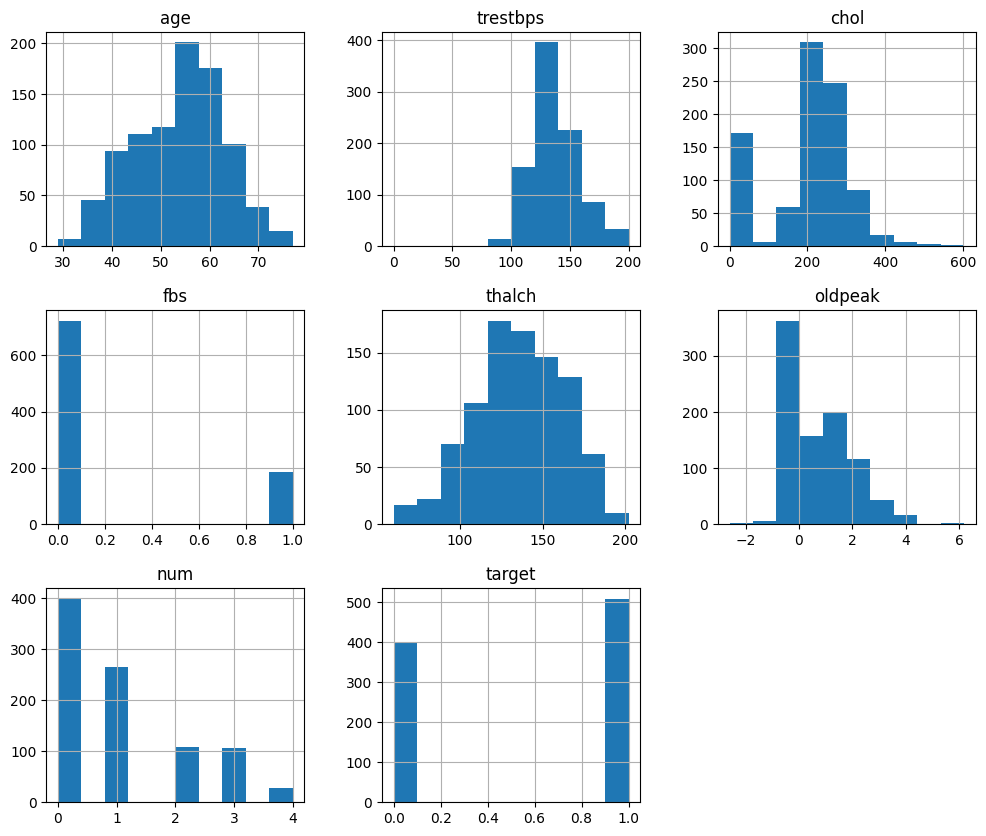

In [16]:
# Histograms
df.hist(figsize=(12,10))
plt.show()


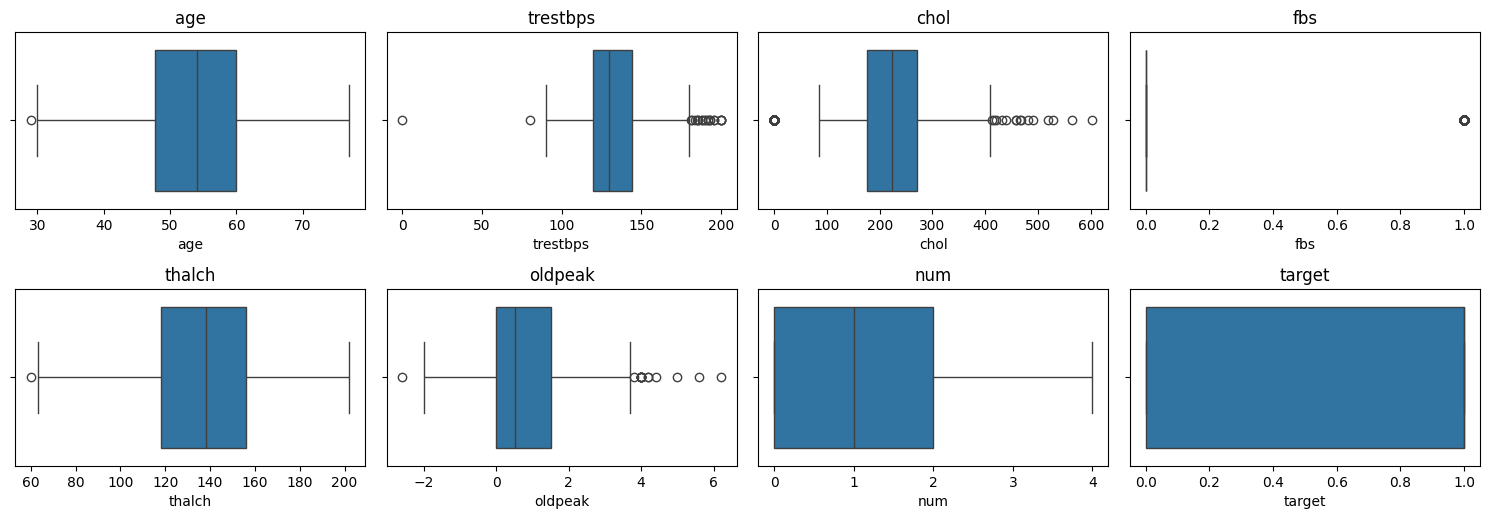

In [17]:
# Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


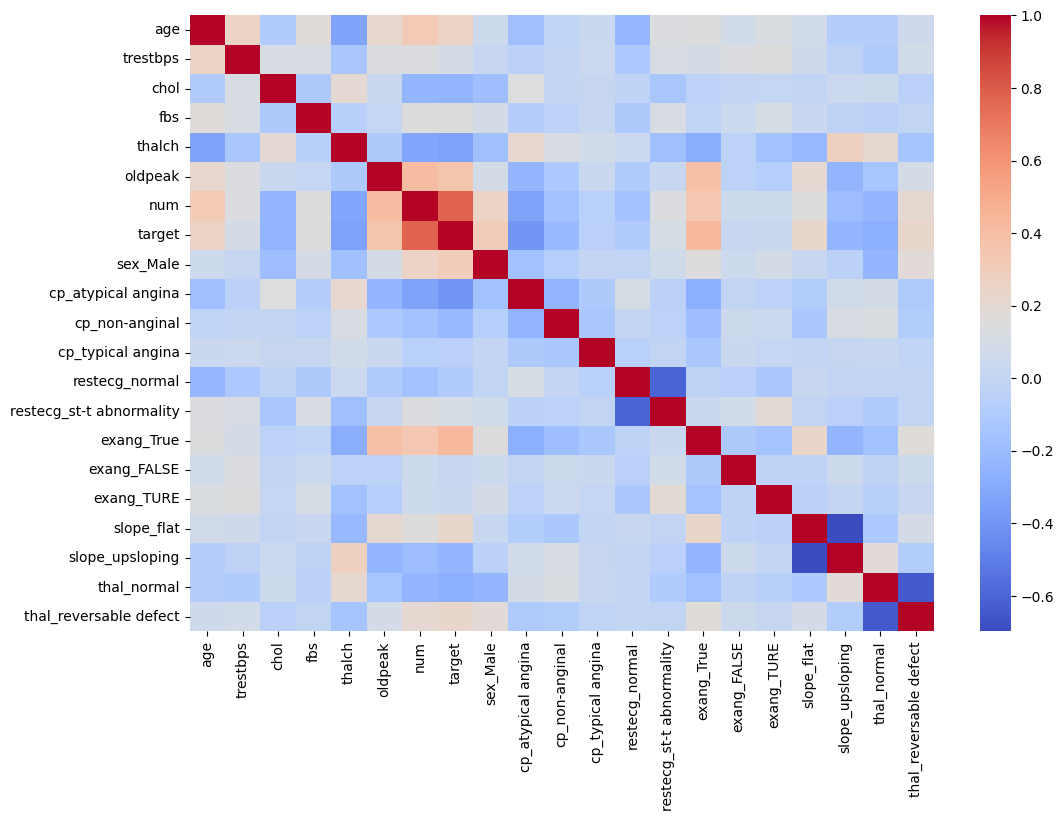

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")  # annot=False if too many features
plt.show()



In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# 6. Decision Tree Model

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = clf.predict(X_test)


In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.7252747252747253


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.71      0.72        89
           1       0.73      0.74      0.73        93

    accuracy                           0.73       182
   macro avg       0.73      0.72      0.72       182
weighted avg       0.73      0.73      0.73       182



In [24]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[63 26]
 [24 69]]


In [25]:
# 7. Hyperparameter Tuning

params = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

In [26]:


grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,
    scoring='accuracy'
)

In [27]:
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best CV Score: 0.7741237600377893


In [29]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)


In [30]:

print("Tuned Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_best))



Tuned Model Performance
Accuracy: 0.7692307692307693


In [31]:
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.76      0.78      0.77        89
           1       0.78      0.76      0.77        93

    accuracy                           0.77       182
   macro avg       0.77      0.77      0.77       182
weighted avg       0.77      0.77      0.77       182



In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Confusion Matrix:
 [[69 20]
 [22 71]]


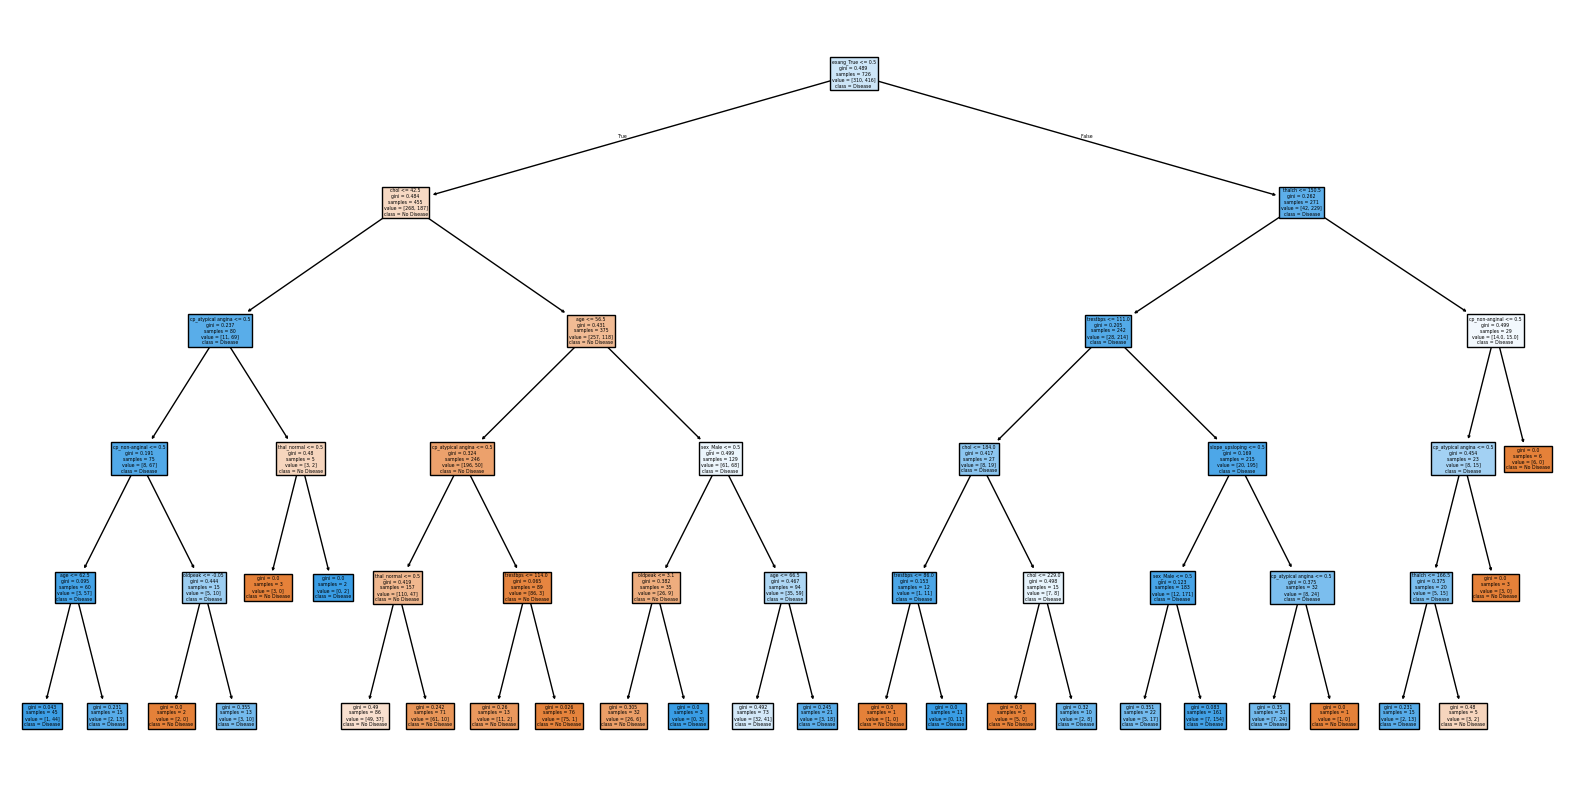

In [33]:
# Decision tree plot
plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    filled=True,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"]
)
plt.show()

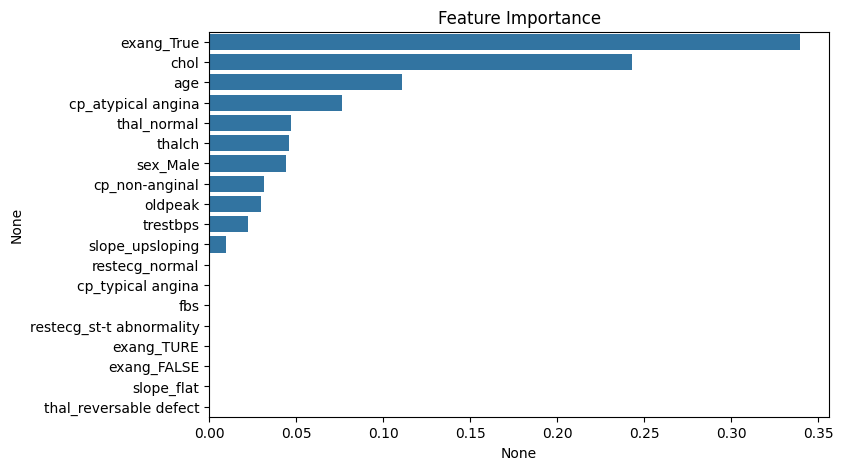

In [34]:
# Feature importance
importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.show()

**Common Hyperparameters of Decision Tree Models & Their Effects**

**1] max_depth**

Controls how deep the tree can grow.

Small value - underfitting (tree too simple).

Large value / None → overfitting (tree memorizes data).


**2] min_samples_split**

Minimum number of samples needed to split an internal node.

Small value - more splits → risk of overfitting.

Large value - fewer splits → risk of underfitting.

**3] min_samples_leaf**

Minimum number of samples required at a leaf node.

Prevents very small leaves (which may capture noise).

**4] criterion (gini, entropy, log_loss)**

Metric to measure the quality of a split.

gini (default) is faster.

entropy gives more information gain-based splits.

**5] max_features**

Number of features to consider when looking for best split.

Reduces overfitting, makes trees more diverse in ensembles (Random Forest).

**6] class_weight**

Handles imbalanced datasets by giving more importance to minority class.



**Common Hyperparameters of Decision Tree Models & Their Effects**

**Label Encoding**

 1] Assigns each category a numeric value (e.g., Male=0, Female=1)

 2] Ordinal data (where order matters, e.g., "Low < Medium < High")

 3] Simple, no dimensionality increase

 4] May mislead model (model thinks 2 > 1 has meaning)

**One-hotencoding**

1] Creates binary columns for each category (Male  [1,0], Female  [0,1])

2] Nominal data (no order, e.g., colors, gender)

3] No risk of implying order between categories

4] Increases dataset size with many categories